# Descriptive Analysis

In [6]:
import pandas as pd
from datetime import datetime
from collections import Counter

In [7]:
df_KSA = pd.read_csv("C:/Users/xying/Desktop/DSBA/CRP/df_KSA.csv")

# Word Count in Themes

In [8]:
# Transforming the tone column into a list
def convert_into_list(string):
    listos = list(string.split(","))
    listos = [float(i) for i in listos] # to get a float list
    return listos

df_KSA.tone = df_KSA.tone.apply(lambda x: convert_into_list(x))

In [9]:
# Tranforming the date to date type, tranforming themes and locations to list of strings.
df_KSA['adj_enhancedthemes'] = df_KSA['adj_enhancedthemes'].apply(lambda x: [word.strip('[').strip(']').strip("'") for word in x.split(', ')])
df_KSA['adj_enhancedlocations'] = df_KSA['adj_enhancedlocations'].apply(lambda x: [word.strip('[').strip(']').strip("'") for word in x.split(', ')])
df_KSA['date'] = pd.to_datetime(df_KSA['date'])


In [10]:
df_KSA['adj_enhancedlocations'].iloc[1]

['Saudis',
 'Yemen',
 'Lebanon',
 'Saudi',
 'Saudi',
 'Saudi',
 'Saudi',
 'Saudi',
 'Saudi',
 'Saudi',
 'Saudi',
 'Saudi',
 'Saudi',
 'Saudi',
 'Saudi',
 'Saudi',
 'Saudi',
 'Saudi',
 'Saudi',
 'Saudi',
 'Bahrain',
 'Bahrain',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Qatar',
 'Djibouti',
 'United Arab Emirates',
 'United Arab Emirates',
 'Egypt',
 'Saudi Arabia',
 'United States',
 'Oman',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'Saudi Arabia',
 'United Arab Emirates',
 'United Arab Emirates',
 'United Arab Emirates',
 'Kuwait']

In [12]:
# word count and world cloud for UAE

# Explode the words_column into separate rows
exploded_df_KSA = df_KSA.explode('adj_enhancedthemes')
word_counts = exploded_df_KSA['adj_enhancedthemes'].value_counts()

print(word_counts[:20])


TAX                5758
FNCACT             3605
EPU                1847
ECON               1787
POLICY             1338
GOVERNMENT          926
ETHNICITY           683
OIL                 679
ENV                 662
GENERAL             657
CRISISLEX           583
ECONOMY             576
WORLDCURRENCIES     518
USPEC               464
HEALTH              443
SAUDI               406
RELIGION            404
SECTOR              397
EDUCATION           390
PUBLIC              390
Name: adj_enhancedthemes, dtype: int64


In [14]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: C:\Users\xying\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


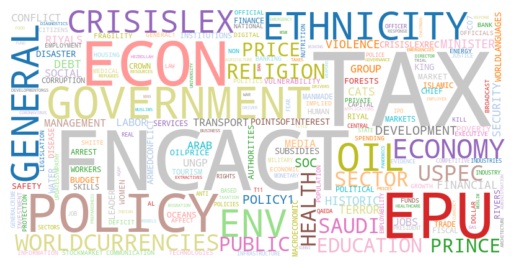

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object with the word counts
wordcloud = WordCloud(background_color='white',
    contour_color='steelblue',
    width=800,
    height=400,
    colormap='tab20').generate_from_frequencies(word_counts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
df_KSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   gkgrecordid            349 non-null    object        
 1   date                   349 non-null    datetime64[ns]
 2   subsourcecommonname    349 non-null    object        
 3   documentidentifier     349 non-null    object        
 4   enhancedthemes         349 non-null    object        
 5   enhancedlocations      349 non-null    object        
 6   tone                   349 non-null    object        
 7   extrasxml              228 non-null    object        
 8   translationinfo        0 non-null      float64       
 9   adj_enhancedthemes     349 non-null    object        
 10  adj_enhancedlocations  349 non-null    object        
 11  Egypt Proportion       349 non-null    float64       
 12  UAE Proportion         349 non-null    float64       
 13  KSA P

C:\Users\xying\AppData\Local\Temp\ipykernel_11584\3758701270.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)


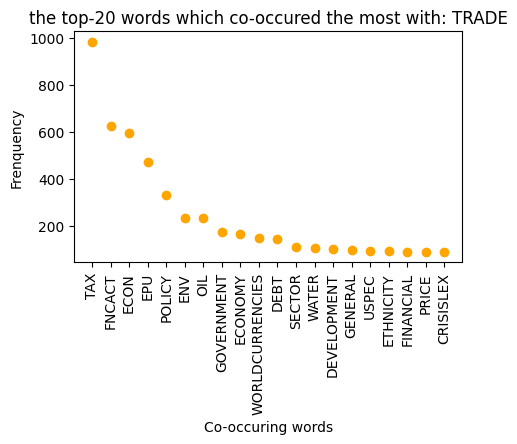

C:\Users\xying\AppData\Local\Temp\ipykernel_11584\3758701270.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)


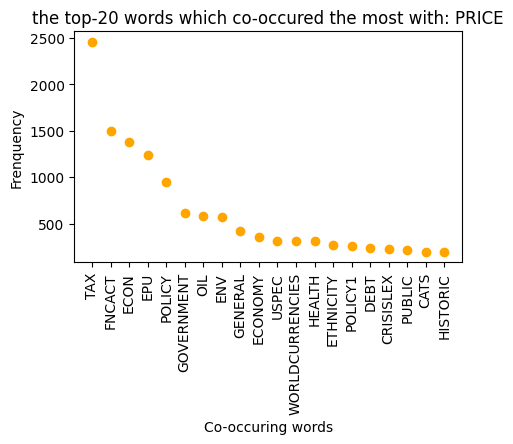

C:\Users\xying\AppData\Local\Temp\ipykernel_11584\3758701270.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)


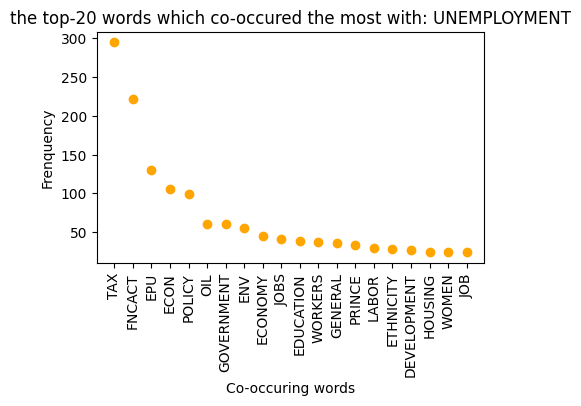

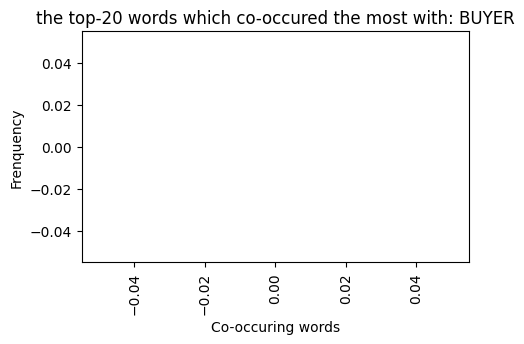

C:\Users\xying\AppData\Local\Temp\ipykernel_11584\3758701270.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)


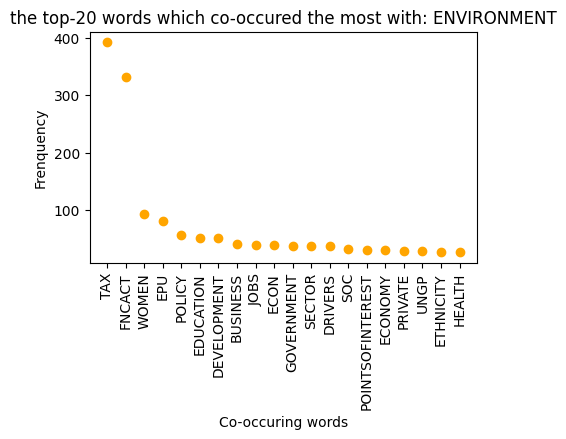

[('TAX', 392),
 ('FNCACT', 331),
 ('WOMEN', 94),
 ('EPU', 81),
 ('POLICY', 57),
 ('EDUCATION', 52),
 ('DEVELOPMENT', 51),
 ('BUSINESS', 41),
 ('JOBS', 40),
 ('ECON', 40),
 ('GOVERNMENT', 38),
 ('SECTOR', 37),
 ('DRIVERS', 37),
 ('SOC', 32),
 ('POINTSOFINTEREST', 31),
 ('ECONOMY', 31),
 ('PRIVATE', 29),
 ('UNGP', 29),
 ('ETHNICITY', 27),
 ('HEALTH', 27)]

In [17]:
def top_cooccuring_words(word,word_column):
    coocurrences = Counter()
    for row in word_column:
        if word in row:
            coocurrences.update(row)
    # Filter out the word 'TRADE'
    coocurrences.pop(word, None)
    top_words = coocurrences.most_common(20)
    # print('the top-20 words which co-occured the most with: {}'.format(word))
    keywords = [t[0] for t in top_words]
    frequencies = [t[1] for t in top_words]

    fig,ax = plt.subplots(figsize=(5, 3))
    ax.scatter(keywords, frequencies, c='orange')
    ax.set_xlabel('Co-occuring words')
    ax.set_ylabel('Frenquency')
    ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)
    ax.set_title('the top-20 words which co-occured the most with: {}'.format(word))
    # Show the plot
    plt.show()
    return top_words

top_cooccuring_words('TRADE',df_KSA.adj_enhancedthemes)
top_cooccuring_words('PRICE',df_KSA.adj_enhancedthemes)
top_cooccuring_words('UNEMPLOYMENT',df_KSA.adj_enhancedthemes)
top_cooccuring_words('BUYER',df_KSA.adj_enhancedthemes)
top_cooccuring_words('ENVIRONMENT',df_KSA.adj_enhancedthemes)

# Tone in years in domains

In [20]:
# Definition of the filter keywords to generate subset of domains
# CONSUMPTION
filter = ['CONSUMPTION','CONSUME','CONSUMER','PURCHASE','PURCHASING','PURCHASER','BUYER','BUY']
df_KSA_CONSUME = df_KSA[df_KSA['adj_enhancedthemes'].apply(lambda x: any(keyword in x for keyword in filter))].reset_index(drop=True)

# TRADE
filter = ['TRADE']
df_KSA_TRADE = df_KSA[df_KSA['adj_enhancedthemes'].apply(lambda x: any(keyword in x for keyword in filter))].reset_index(drop=True)

# EMPLOYMENT
filter = ['EMPLOYMENT','UNEMPLOYMENT']
df_KSA_EMPLOY = df_KSA[df_KSA['adj_enhancedthemes'].apply(lambda x: any(keyword in x for keyword in filter))].reset_index(drop=True)

# EXPORTS
filter = ['EXPORTS','EXPORT']
df_KSA_EXPORTS = df_KSA[df_KSA['adj_enhancedthemes'].apply(lambda x: any(keyword in x for keyword in filter))].reset_index(drop=True)

# IMPORTS
filter = ['IMPORTS','IMPORT']
df_KSA_IMPORTS = df_KSA[df_KSA['adj_enhancedthemes'].apply(lambda x: any(keyword in x for keyword in filter))].reset_index(drop=True)

# PRICE
filter = ['PRICE']
df_KSA_PRICE = df_KSA[df_KSA['adj_enhancedthemes'].apply(lambda x: any(keyword in x for keyword in filter))].reset_index(drop=True)



In [19]:
# show the numer of articles per year and avg_tone per year in a specific domain

def add_tone_column(list_,df_, suffix_):
    list_ = list_.to_frame(name=f'avg_tone_{suffix_}')
    df_ = df_.join(list_,on=df_.date)
    return df_

def tone_among_years(df):
    # Count the number of articles per year in a specific economic domain
    tone_domains_year= df.groupby(df.date.dt.year)['adj_enhancedthemes'].count().to_frame(name='num_articles').reset_index()
    # Calculate the mean of tones in in a specific domain
    avg_general_tone = df.groupby(df.date.dt.year)['tone'].apply(lambda x: x.str[0].mean())
    avg_positive_tone = df.groupby(df.date.dt.year)['tone'].apply(lambda x: x.str[1].mean())
    avg_negative_tone = df.groupby(df.date.dt.year)['tone'].apply(lambda x: x.str[2].mean())
    tone_domains_year = add_tone_column(avg_general_tone, add_tone_column(avg_positive_tone,\
                        add_tone_column(avg_negative_tone, tone_domains_year,'general') ,'positive'), 'negative')
    return tone_domains_year



In [21]:
tone_TRADE = tone_among_years(df_KSA_TRADE)
tone_EXPORTS = tone_among_years(df_KSA_EXPORTS)
tone_IMPORTS = tone_among_years(df_KSA_IMPORTS)
tone_EMPLOY = tone_among_years(df_KSA_EMPLOY)
tone_EXPORTS


C:\Users\xying\AppData\Local\Temp\ipykernel_11584\3209895545.py:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  avg_general_tone = df.groupby(df.date.dt.year)['tone'].apply(lambda x: x.str[0].mean())
C:\Users\xying\AppData\Local\Temp\ipykernel_11584\3209895545.py:13: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(...,

,date,num_articles,avg_tone_general,avg_tone_positive,avg_tone_negative
0,2015,3,2.339189,1.661581,-0.677609
1,2016,5,3.053897,1.997716,-1.056181
2,2017,2,2.940819,3.375553,0.434735
3,2018,1,1.346801,1.683502,0.336700
4,2019,1,0.975927,2.081978,1.106051
5,2020,1,5.277778,1.388889,-3.888889


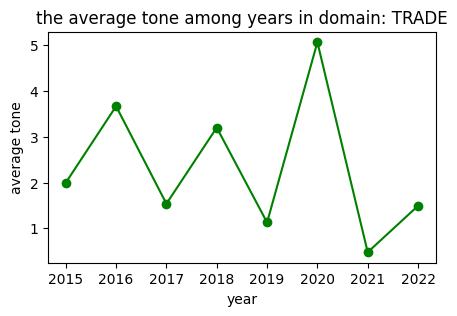

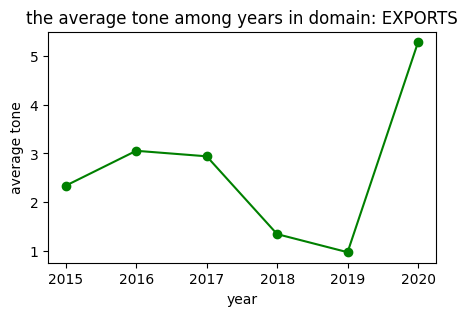

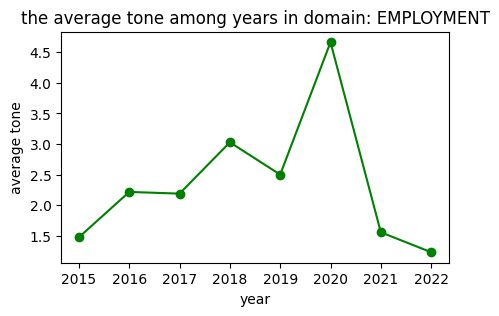

In [22]:
def plot_tone_domain(df_,suffix_):
    fig,ax = plt.subplots(figsize=(5, 3))
    ax.plot(df_.date, df_.avg_tone_general, c='g',marker='o')
    ax.set_xlabel('year')
    ax.set_ylabel('average tone')
    ax.set_title(f'the average tone among years in domain: {suffix_}')
    # Show the plot
    plt.show()

plot_tone_domain(tone_TRADE, 'TRADE')
plot_tone_domain(tone_EXPORTS, 'EXPORTS')
plot_tone_domain(tone_EMPLOY, 'EMPLOYMENT')